# Application for Quantitative Researcher position
Due date: Thursday, 16 December 2021 <br>
by: __Karan Singh__

## Contents

- [Task-1 Analysis of Cryptocurrency Data](#task1)
    - [Imports](#imports)
    - [Display settings](#settings)
    - [Loading dataset provided](#data_load)
    - [Introduction](#intro)
    - [Data cleaning & preparation](#clean_prep)
    - [Data analysis](#data_analysis)    
    - [Dynamic Range NVT Signal](#dynamic_nvts)
    - [Results](#results)                      
- [Task-2 - Machine Learning Features](#task2)

<a id='task1'></a>
## Task-1 - Analysis of Cryptocurrency Data <br>

<a id='imports'></a>
Imports

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import yfinance as yf
from funcs import analyze_and_plot, ml_example
from sklearn.metrics import mean_squared_error
import joblib

<a id='settings'></a>
Setting the display settings for numerical data

In [2]:
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(suppress=True, formatter={'float_kind':'{:.5f}'.format})

<a id='data_load'></a>
Loading the dataset provided

In [3]:
d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
nvt_data = pd.read_csv('gn_indicators_nvt_and_velocity_hourly.csv', parse_dates=['timestamp'], date_parser=d_parser, 
                        dtype={'nvt': np.float64, 'nvts': np.float64, 'velocity':np.float64, 'symbol': str})
nvt_data = nvt_data.set_index('timestamp')
# Make sure that the datetime index is in chronological order
nvt_data.sort_index(inplace=True)

In [4]:
# Data from yFinance
coin_pair_hist = joblib.load('coin_pair_hist')

<a id='intro'></a>
#### Introduction <br>
The following sections contain the steps involved in acquiring, pre-processing, analysing and presenting the data. 


<a id='clean_prep'></a>
#### Data cleaning and preparation<br>
The NVT data provided along with the yFinance api calls was used to perform the statistical analysis. The yFinance data has been downloaded and stored and will be provided along with the file. Out of all the cryptocurrencies provided, 44 have been retained for analysis. Some cryptos were deleted because the yFinance api did not return any data. USDC & USDT were discarded because they are stable coins i.e. their value is pegged to the US dollar and any predictive analytics for their value against a USD pair is not meaningful in this context. The use of stable coins and the systems and algorithms for maintaining their peg is a research topic on its own.
The NVT data has been reduced to daily frequency by returning the mean value of all daily data. Any missing days has been forward filled by the previous day’s values. Similarly, the historical price data from yFinance is in daily frequency and missing values have been forward filled. Finally, the NVT data and historical price data have been merged together based on dates.


<a id='data_analysis'></a>
#### Data Analysis <br>
For all the shortlisted cryptocurrencies, the Network Value to Transaction Signal (NVTS) has been used as the primary source of analysis. As per the link provided \([emailed_link](https://academy.glassnode.com/indicators/nvt)\), NVTS is calculated by:


$$ NVTS = \frac{Market\:Cap\:(USD)}{Transaction\:Volume\:(90\:day\:moving\:average)}$$

Because the NVTS uses a 90 moving average instead of daily movements, any daily fluctuations are smoothed out yielding a better trend indicator for the underlying asset. While some believe that the market will find _equilibrium_ i.e. when assets are undervalued investors will buy the asset driving prices up and when they are overbought, investors will sell leading to lowering prices. On the other hand, others \([Dmitry Kalichkin](https://academy.glassnode.com/indicators/nvt/nvt-signal)\) believe that cryptocurrencies exhibit _reflexivity_ i.e. the self-reinforcing effect of market sentiment; when prices are rising investors will continue to buy driving prices further up until sentiments are reversed and then investors start to sell which feeds the same behaviour but in reverse.

<a id='dynamic_nvts'></a>
##### Dynamic Range NVT Signal <br>
A statistical method that signals buy and sell points using the NVTS is the Dynamic Range NVT Signal \([Charles Edwards](https://medium.com/unconfiscatable/dynamic-range-nvt-signal-for-bitcoin-valuation-400721abebe7)\).<br> In it, an overbought & oversold positions are calculated by the following equations: <br> 


$$ overbought = NVTS > 2\text{-}year\:mean + 2.0 * standard\:deviations $$
$$ oversold = NVTS < 2\text{-}year\:mean + 0.5 * standard\:deviations $$

Cryptocurrencies are a relatively new asset class and behaves like a start-up, with a lot of volatility being driven by speculation of future earning potential. Further, some blockchains make side-chain and off-chain transactions that are not captured by the public blockchain data.  It is because of these reasons, the previous 2-year historical data is used to calculate the Dynamic Range NVT signals in order to take into account the eventual on-chain transactions and short term volatility. 

For the purpose of determining a return predicting hypothesis, the Dynamic Range NVT Signal is calculated for the shortlisted cryptocurrencies. For some cryptocurrencies 2-year data is unavailable. In such cases, half of the duration of the available data is used instead. Based on the above equations, a Buy signal is returned if the NVTS is less than the oversold line, a Sell signal is returned if the NVTS is greater than the overbought line and a Hold signal is returned if the NVTS line is between the overbought & oversold lines. After the signals are calculated, a simulation is run on the data where; we start with an initial investment corpus of \$100K. For everyday in the data, we spend \$1000 of the corpus to buy the asset if there is Buy signal. If there is a Sell signal, we sell \$1000 worth of the cryptocurrency. If we have less than \$1000 in the corpus and there is a Buy signal we spend the entire remaining corpus. Similarly, if we have less the $1000 worth of assets and a Sell signal we sell the entire amount.

This approach does not consider any risk management mechanisms such as the win rate of our investment strategy and expected returns on an investment. Neither does it make any market predictions as to the trend or direction of the given asset. This signal has been developed using the past historical prices and indicators and may not be the best tool to predict future price movements.  

<a id='results'></a>
#### Results

The results of the simulation are provided in the charts below. For each crypto asset, there are 2 graphs; the first one shows the Close price data from yFinance with the Buy & Sell position marked on the graph. Buy signals are marked in green and sell signals are marked in red. The text box displays the total corpus at the end of the simulation and the amount of cryptocurrency held. The amount of cryptocurrency held is multiplied by the Close price of the last day of the simulation to show the current market value of assets held. The second graph shows the NVTS line and the overbought line in red and oversold line in green. 

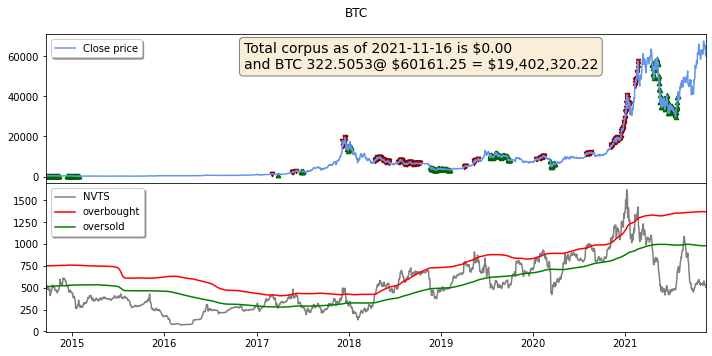

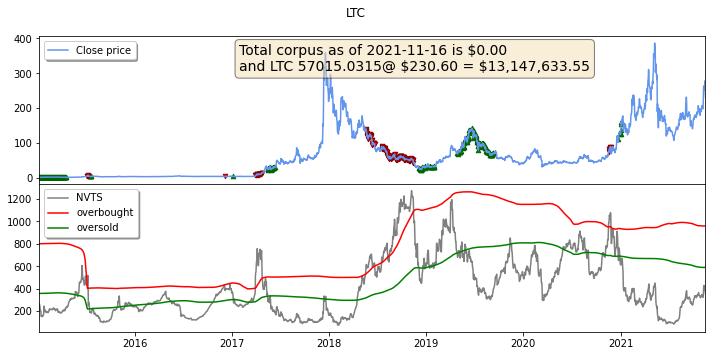

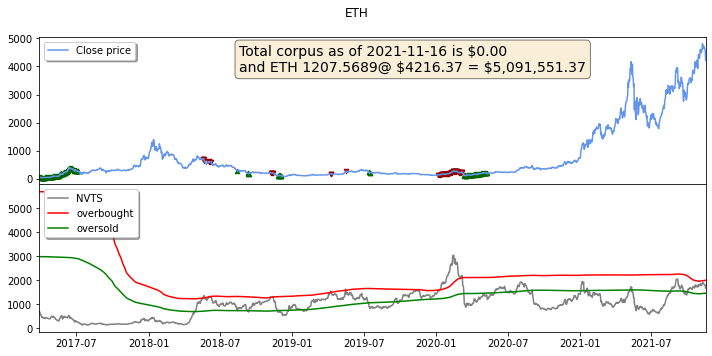

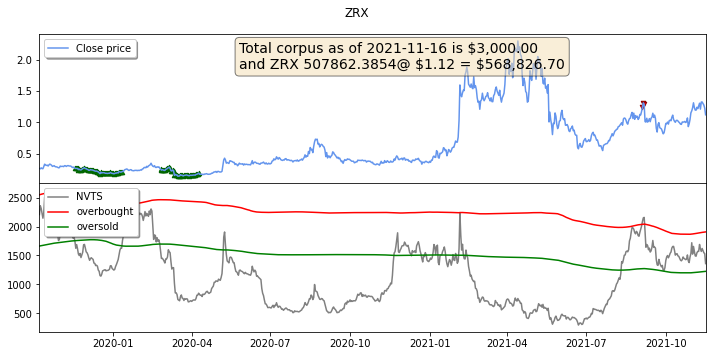

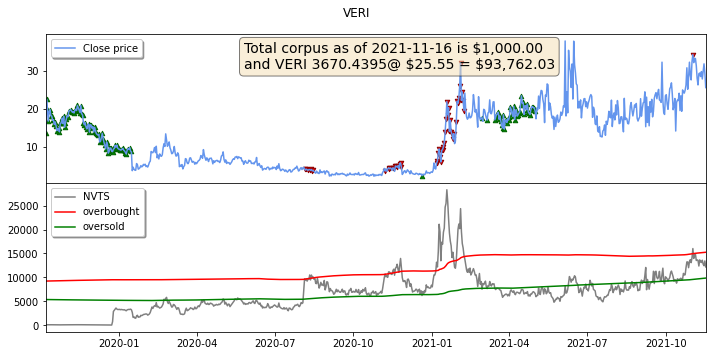

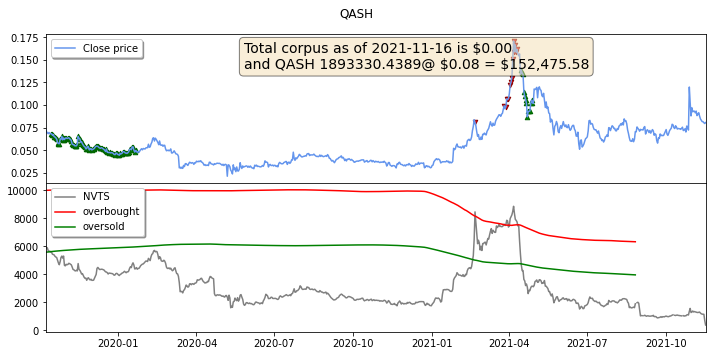

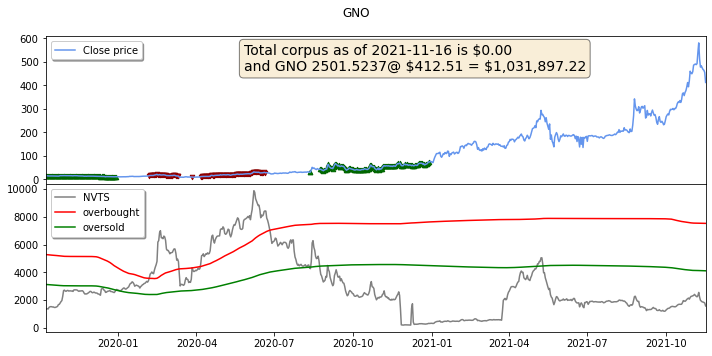

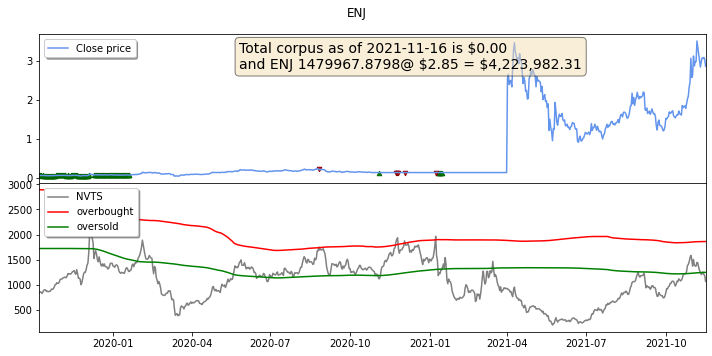

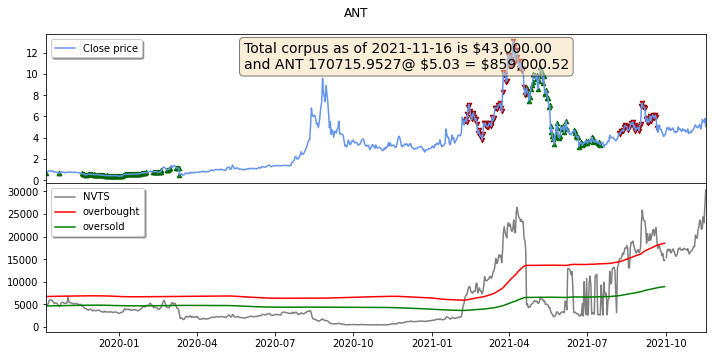

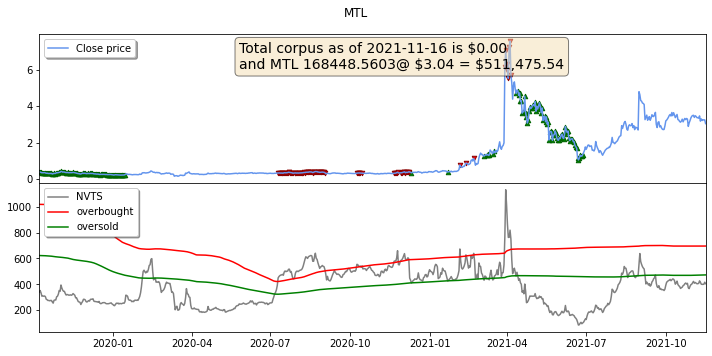

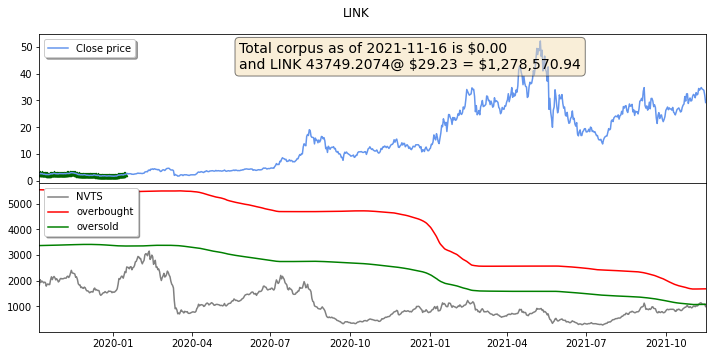

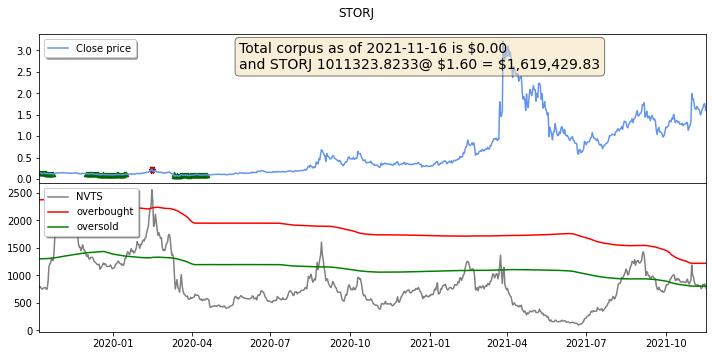

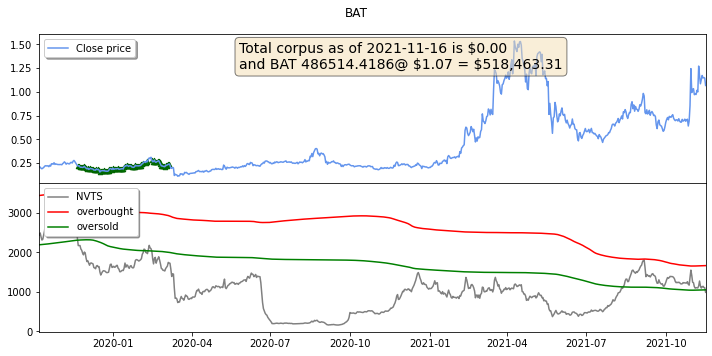

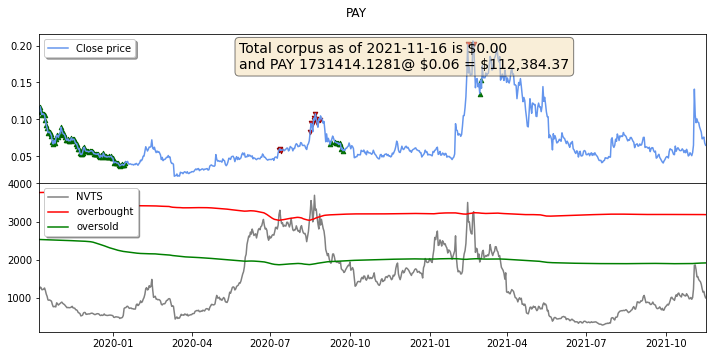

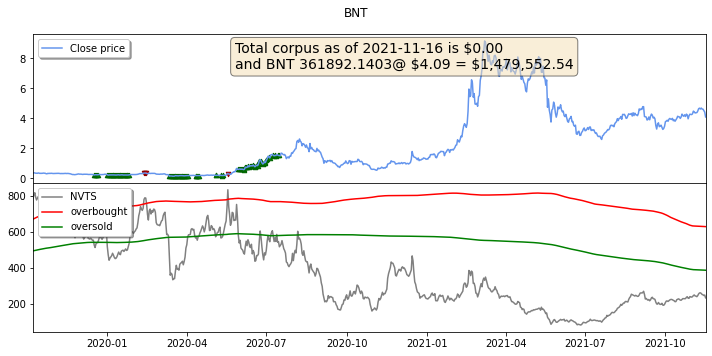

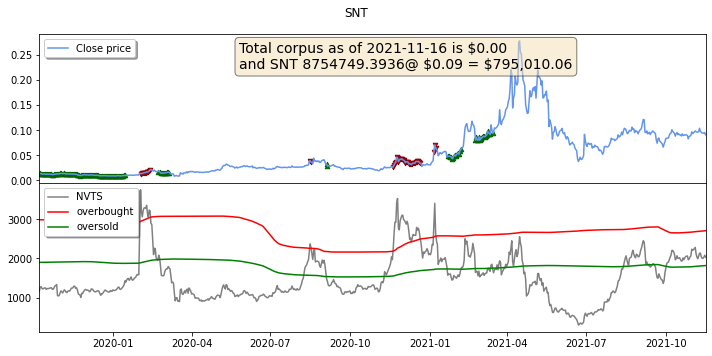

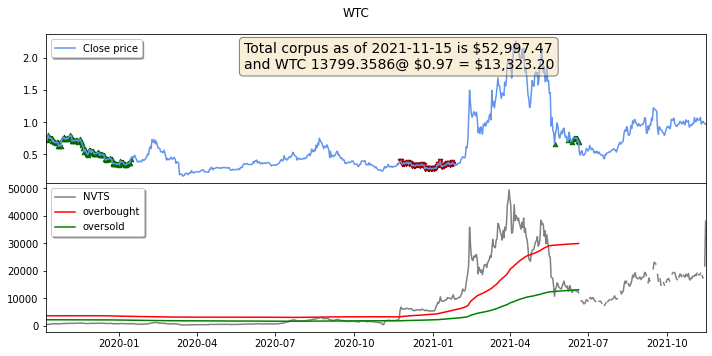

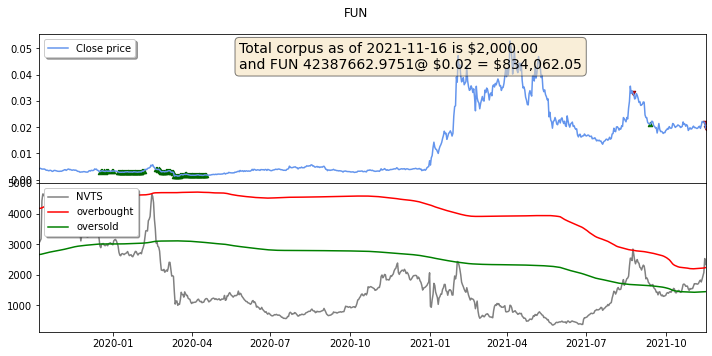

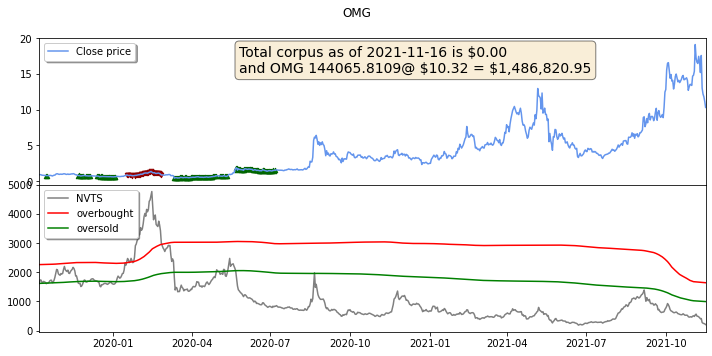

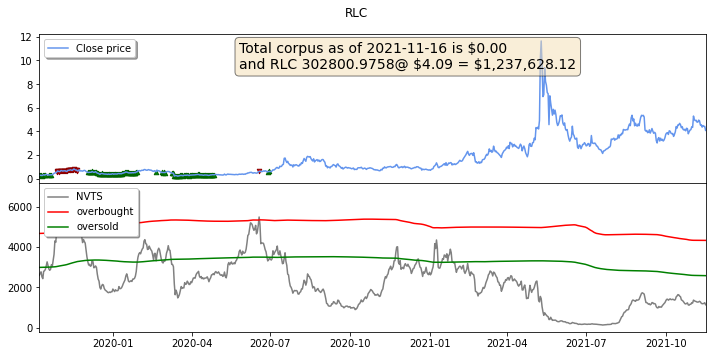

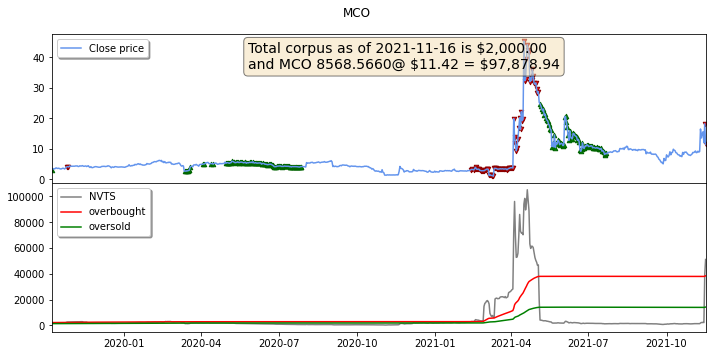

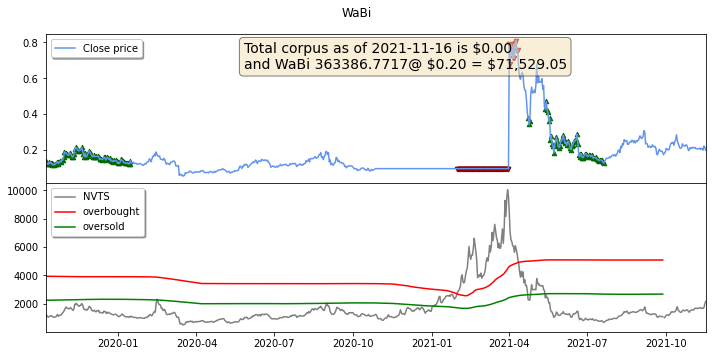

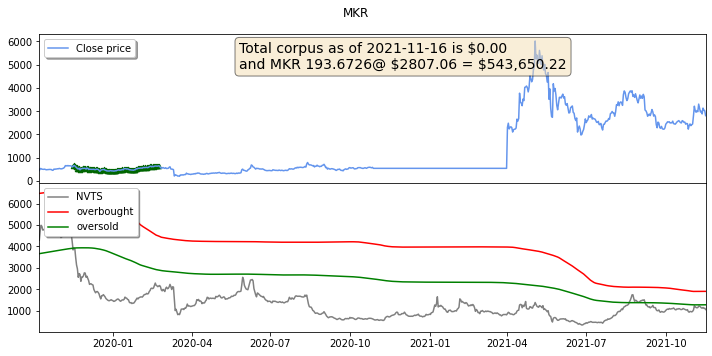

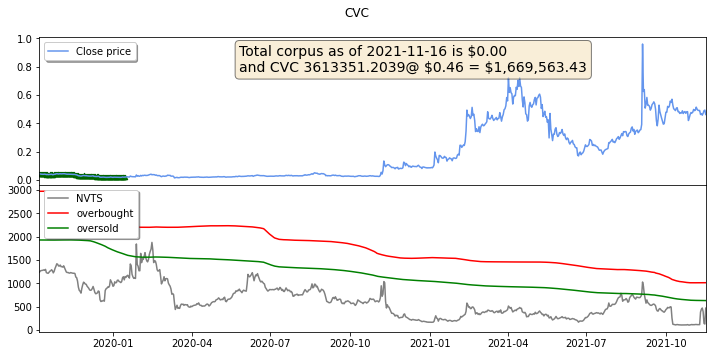

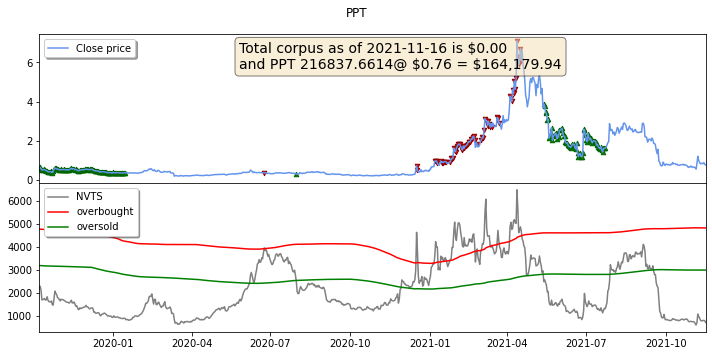

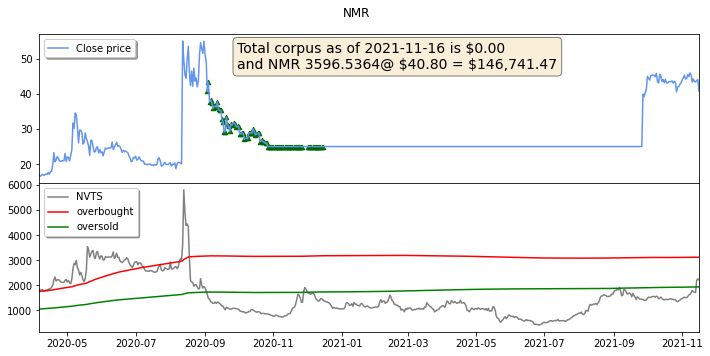

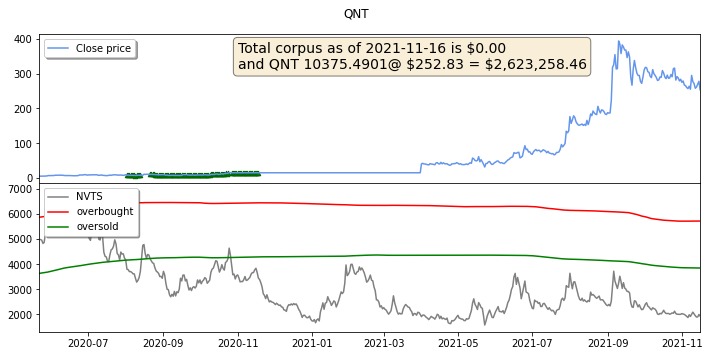

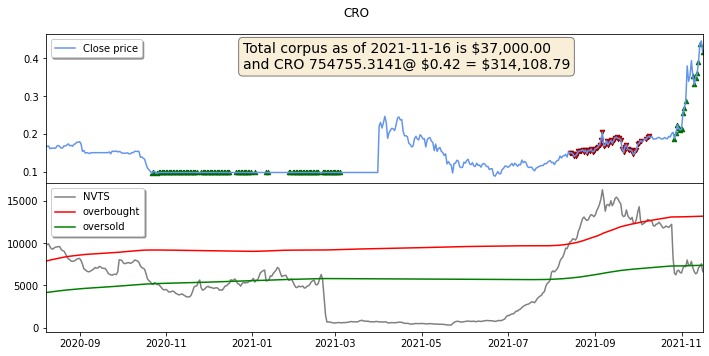

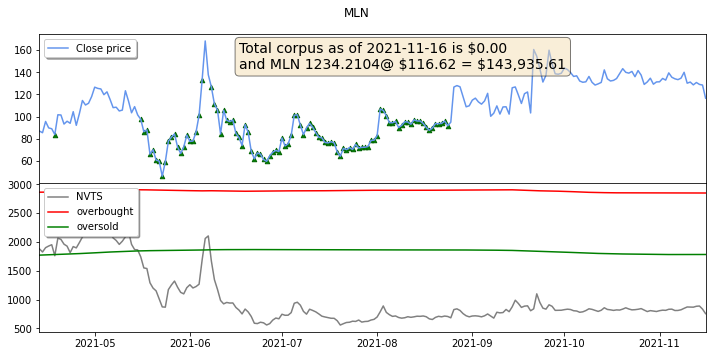

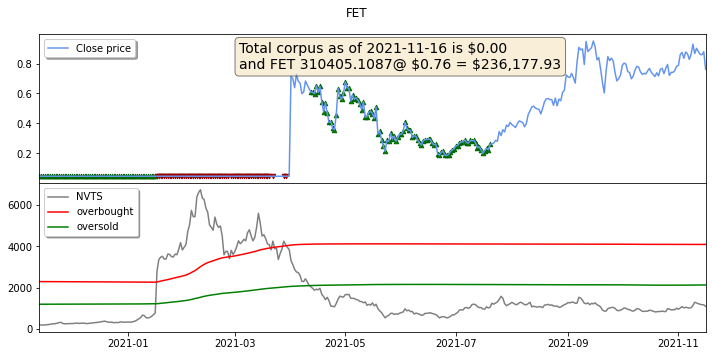

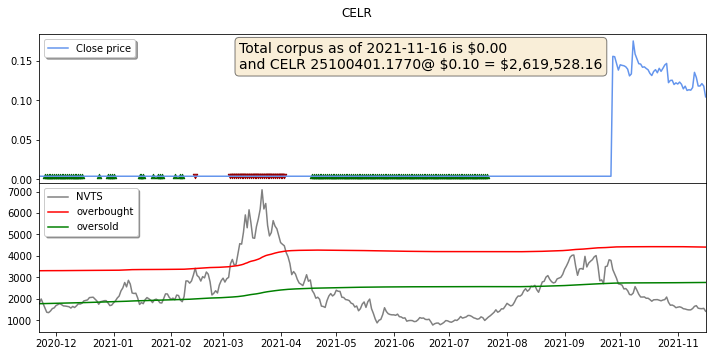

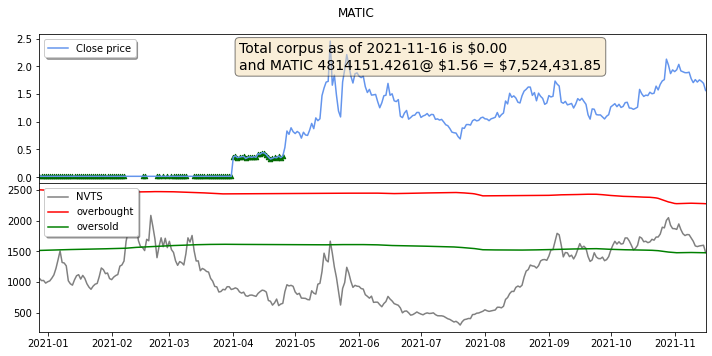

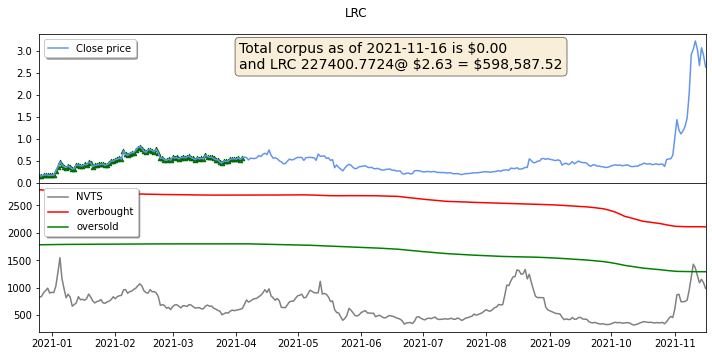

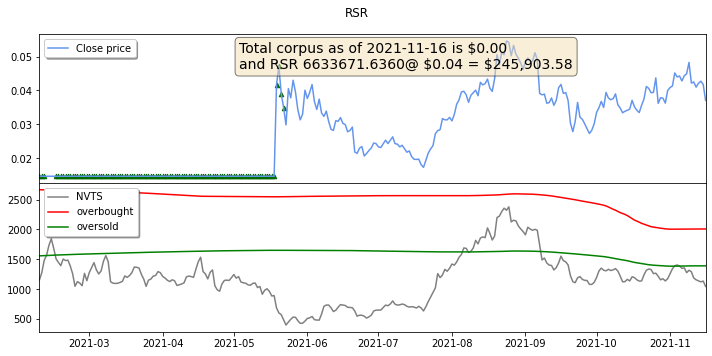

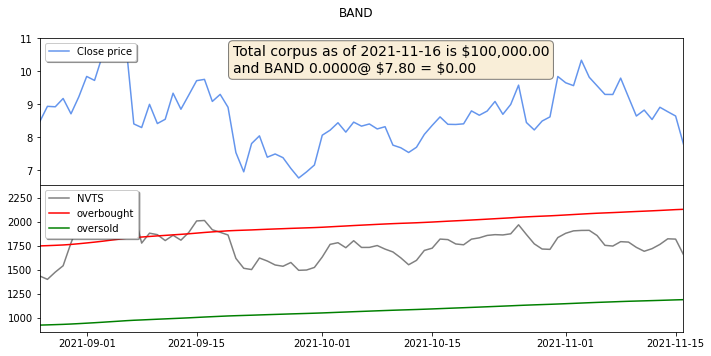

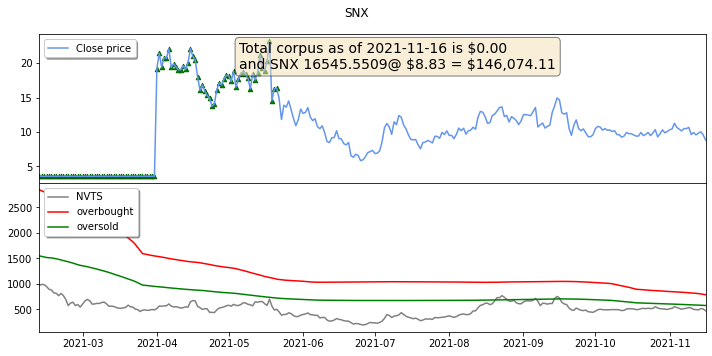

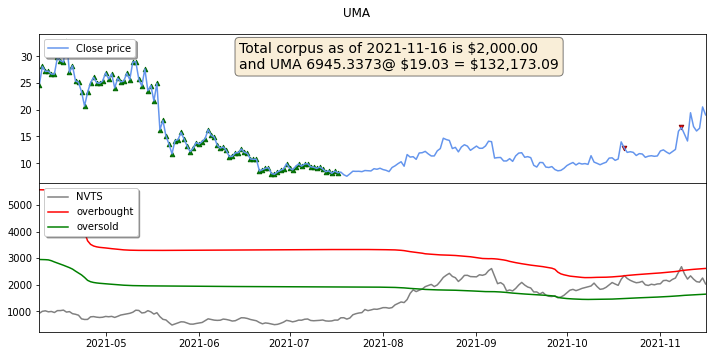

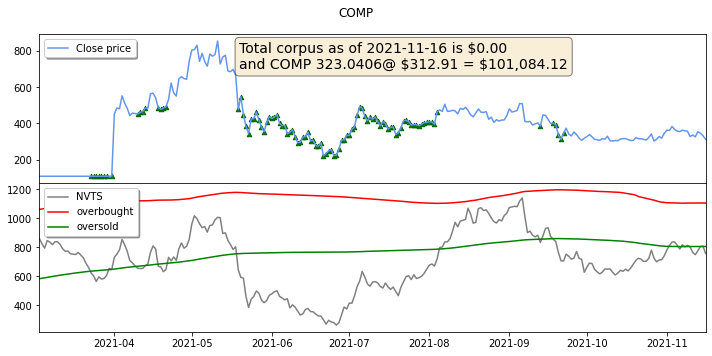

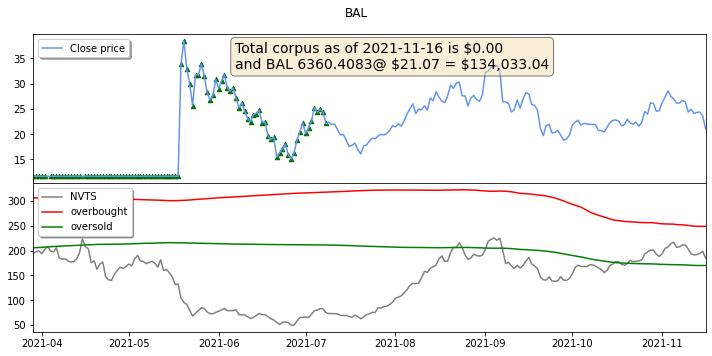

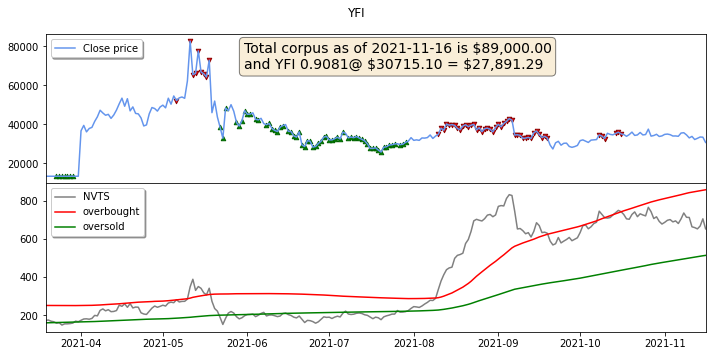

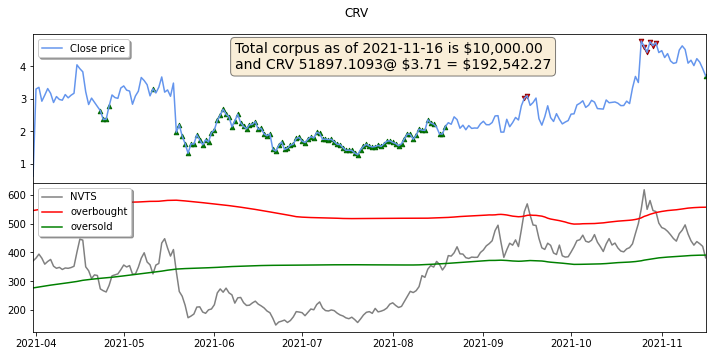

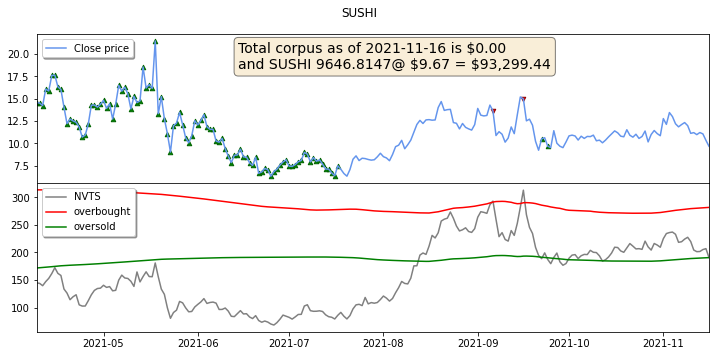

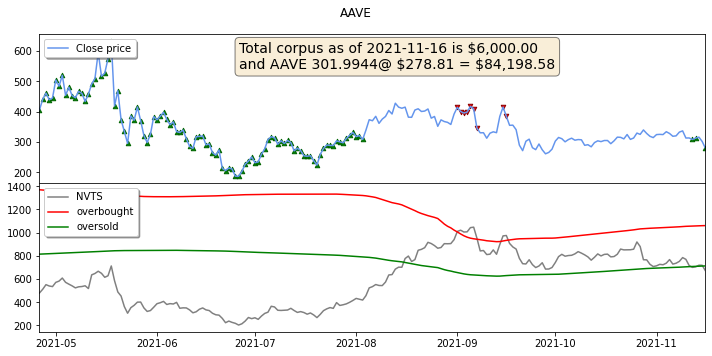

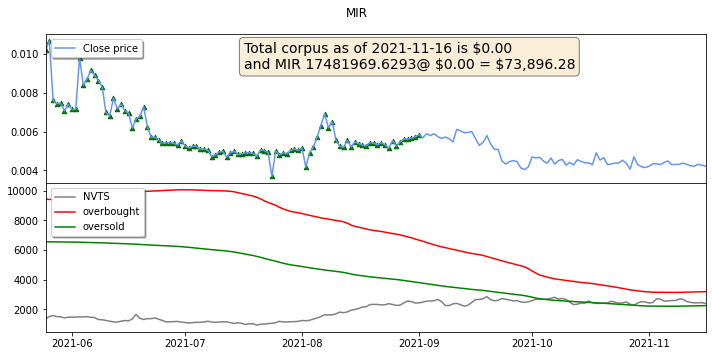

In [5]:
for coin in coin_pair_hist:
    analyze_and_plot(coin, coin_pair_hist[coin]['pair'], coin_pair_hist[coin]['hist_df'], nvt_data)

As mentioned previously, the Dynamic Range NVT Signal was developed by looking at historical data and signals and therefore, might not be sufficient in predicting future trends and price movements. It can be used along with other features in a machine learning model that can (or attempt to) make predictions about the future price movements. 

<a id='task2'></a>
## Task-2 - Machine Learning Features

Before deciding on which machine learning features should be used it is important to consider the goal of the application. High frequency trading will need to have information that can assess even the smallest price movements in the underlying asset. Whereas, if the intention is to create a portfolio of assets that returns a steady return on investment over the long term, then the goal is to identify trending indicators. Some of the machine learning features mentioned below can be used for either application:

1. Sentiment Analysis - Fear & Greed index \([source](https://alternative.me/crypto/fear-and-greed-index/)\) is calculated by analysing the social media feeds and can easily be plotted on a graph. As mentioned, the _reflexivity_ of crypto markets makes this a good indicator to determine sentiments and may help predict price movements. The Similar to the Dynamic NVT Signal, it can be used to calculate corelations between price movement and position on the fear & greed index. Another alternative is the Bull & Bear index \([source](https://www.augmento.ai/bitcoin-sentiment/)\).
2. Inflation – some have argued that inflation in fiat currencies will lead people investing in cryptos because some crypto assets have limited supply \([source](https://www.forbes.com/sites/martinrivers/2021/11/20/why-bitcoin-is-the-best-weapon-society-has-against-inflation-and-wealth-inequality/?sh=1ba512f331ce)\). Inflation is easily measured with many publications tracking and reporting the rate of inflation. Historic data on inflation and demand can be used to determine if higher inflation leads to greater demand and increased prices.
3. Hash ribbons – is a metric used to identify if a miner has capitulated and could mean a buying opportunity. It has been used to predict buying opportunities previously \([source](https://honestcrypto.io/bitcoin-hash-ribbons-indicator/)\).
4. Presence of whales on the exchanges – because cryptocurrencies can be stored in offline hardware and software wallets, investors are more likely to move their investments onto an exchange if they are going to trade. By identifying addresses of exchanges and whales it might be possible to predict price movements of a particular asset on an particular exchange.  
5. Government regulations – because outright bans can lead to a precipitous drop in prices, any news feeds with new regulations can be monitored using Natural Language Process (NLP) techniques for key words like 'government ban' or 'crypto' to be used as features. We can then see if there is a correlation between words and price movement. 
6. Acceptance as a currency – unlike government bans, some countries like El Salvador have made cryptocurrencies legal tender. Similarly, if large hedge funds and investment brokerages start to invest in cryptocurrencies it will have a positive impact on prices. The same mechanisms used to detect regulations can be deployed to look out for such changes.
7. Demand & supply – the supply of cryptocurrencies has a major impact on its price. Some cryptocurrencies like Bitcoin have a limited supply, whereas Ethereum does not. The economics of each crypto should be factored in while valuing its future potential.  
8. Security – events like smart contract bugs, exchange hacks and even the advent of quantum computing can compromise the value of a cryptocurrency. When such an event takes place, market sentiment turns against the asset and can lead to a sell-off. It might be possible to predict such sell-offs before news outlets report it; by monitoring platforms like Discord and Reddit using the same NLP techniques used for monitoring media. 
9. Number of exchanges – while this indicator will not be suitable for high frequency trading, but for long term investments the number of exchanges can point to how many people have access to cryptocurrencies. The opening of crypto exchanges means that people can gain access to this asset class which can lead to increased buying. Similarly, the closure of these exchanges can mean less access. 
10. Investments in traditional assets – given that cryptocurrencies are gaining more widespread acceptance the linkages between cryptocurrencies and traditional assets is also growing. For example, when the Chinese real estate company Evergrande filed for bankruptcy the prices of cryptocurrencies was negatively impacted. Investors might be selling cryptocurrencies to pay off debts leading to a price decline. This is difficult to evaluate as a machine learning feature. However, it was rumoured that the stable coin Tether was holding investments in Evergrande to keep its peg to the US Dollar \([source](https://www.reuters.com/business/finance/stablecoin-tether-says-holds-no-evergrande-commercial-paper-2021-09-16/)\). If we know of any such linkages between traditional assets and a cryptocurrency then we can use the indicators of the traditional asset to predict the price of the cryptocurrency. 
11. Use cases of the blockchain – blockchains like Ethereum allow applications to be built using the underlying technology. When more and more people start building on the blockchain, the underlying cryptocurrency can see more investment. There have been many blockchains that are trying to replicate Ethereum’s success and offer lower fees and better functionality. The number of addresses paying fees can be used as a technical indicator to determine the adoption rate of the blockchain versus investors hodling the asset. 

Technical indicators like MACD, RSI, Aroon etc. have a long history of being used as features in machine learning models but have been kept out as requested. 

The chart below the prices for BTC-USD are shown with the prediction values being randomly generated. 

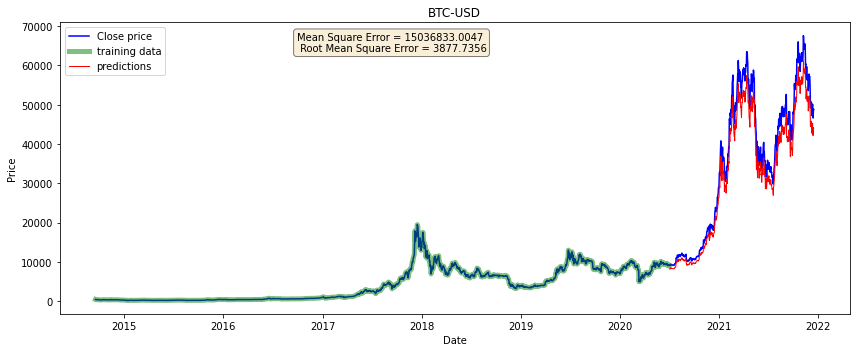

In [20]:
ml_example('BTC-USD')

In order to identify the most accurate features and machine learning model, we need to split the data into training and testing. As shown in the figure above, we can take 80% of the data as training and the remaining for testing. We train the model using the identified features and test it on the test data and get an error e.g. mean squared error or root mean squared error. The goal is to reduce the error by trying different machine learning models and features. One way to identify the features that have the best correlation is to start with only one feature e.g. NVTS, and add another feature and see if prediction accuracy improves. If the accuracy improves, then we can assume that feature has a strong correlation to the data. We continue to add features to the machine learning model until we have the best group of features that yield the highest accuracy. This process should be carried out for different machine learning models to asses their performance. 
As seen from the chart above, the training data and the testing data are very different because the asset prices have appreciated a lot. It is unlikely that a machine learning model will be able to predict this price increase accurately.  


---